In [1]:
%matplotlib notebook
import matplotlib
import seaborn as sb
from matplotlib import pyplot as plt
import holoviews as hv

import numpy as np
import pandas as pd
import pickle as pk
from time import time

# Jupyter Specifics
%matplotlib inline
from IPython.display import display, HTML
from ipywidgets.widgets import interact, interactive, IntSlider, FloatSlider, Layout, ToggleButton, ToggleButtons, fixed, Button, HBox, VBox
# display(HTML("<style>.container { width:100% !important; }</style>"));
# style = {'description_width': '100px'};
# slider_layout = Layout(width='99%');

/Users/n/.pyenv/versions/3.7.2/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from Cluster import *

In [3]:
bd = BaseData('data_all_base')

reading in data from data_all_base ...
elapsed:  8.615565061569214


In [4]:
def get_cluster_data(clusdtype):
    #ClData=ClusterData(bd,clusdtype='JRP1',cluster_data=True)  # ideally this should be made to work
    print('reading in data from','./pks/data_cluster_'+clusdtype+'.pk','...')
    with open('./pks/data_cluster_'+clusdtype+'.pk','rb') as fp:
        foo = pk.load(fp)
    return foo['ClData']

In [5]:
clusdtype='JRP1'
ClData = get_cluster_data(clusdtype)

reading in data from ./pks/data_cluster_JRP1.pk ...


In [6]:
exec(open('ClusterFit.py','r').read())

In [7]:
# from model_fits_age import *  # including ModelFit class definition.

**Consensus clustering and map**

In [8]:
# from Consensus import *
# NB:  scoping problem seems to prevent import from working properly.
# instead use exec below.
country_display = None
geog = None
geog1 = None
exec(open('Consensus.py','r').read());

In [9]:
#foo = Consensus(cases=['deaths','cases','cases_nonlinr'])
clus = Consensus(ClData,cases = ['deaths', 'cases', 'cases_nonlinr']);


77 countries
reference clustering (numbered from 0) is 11


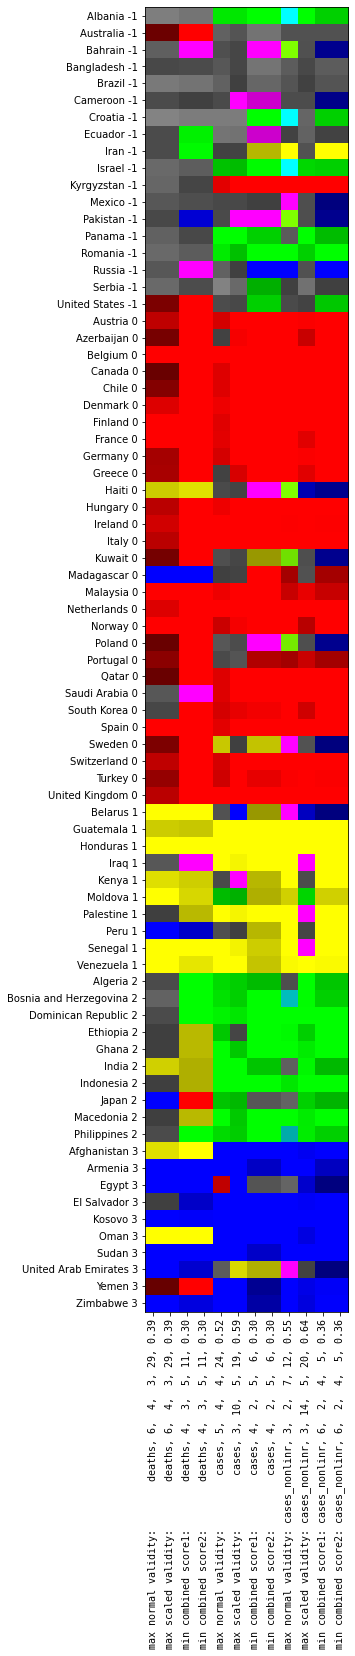

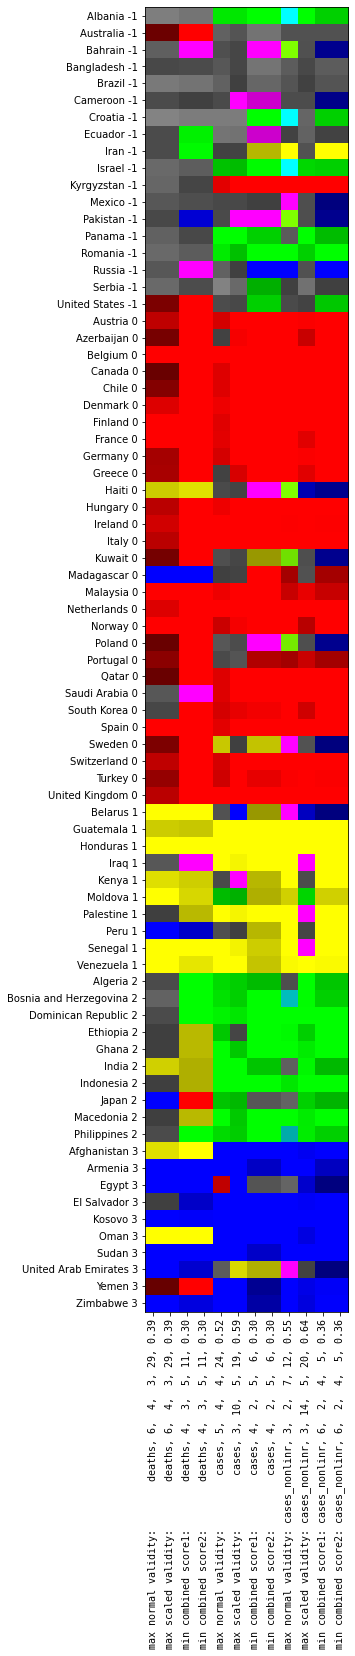

In [10]:
clus.scan()
clus.make_clusters()
clus.swizzle()
clus.plot_swiz()

In [11]:
def myplot(cons, dataname='deaths',country='Australia'):
    try:
        if country in cons.countries:
            plt.plot(cons.cldata.clusdata_all[dataname][country])
    except:
        plt.plot(cons.cldata.clusdata_all[dataname]['Australia'])
        
country_display = interactive(myplot,cons=fixed(clus),dataname=clus.cases,country=clus.countries);

In [12]:
#display(country_display)
clus.make_map();

In [13]:
clus.map;
clus.map.min_height=600;

In [15]:
line_button = Button(description="Lines");
scat_button = Button(description="Scatter");
button_section = HBox([line_button, scat_button]);
right_box = VBox([button_section, country_display]);
HBox([clus.map,right_box])     

TraitError: Invalid selection: value not found

TraitError: Invalid selection: value not found

TraitError: Invalid selection: value not found

TraitError: Invalid selection: value not found

TraitError: Invalid selection: value not found

TraitError: Invalid selection: value not found

TraitError: Invalid selection: value not found

TraitError: Invalid selection: value not found

TraitError: Invalid selection: value not found

TraitError: Invalid selection: value not found

TraitError: Invalid selection: value not found